# Tutorial de pandas para preprocesamiento de datos

Pandas es una biblioteca open source de Python con la que se puede analizar datos [5]. En este tutorial aprenderemos a realizar un preprocesamiento y limpieza de datos mediante las funciones de Pandas, con la cual se puede [2,3,4,6]:

1. Convertir una lista o diccionario de Python, o un arreglo de Numpy, a un data frame de Pandas.
2. Abrir un archivo local en formato CSV, TSV, Excel, etc, y guardar los datos en un data frame.
3. Abrir un archivo o base de datos remoto.

Para poder utilizar la biblioteca de Pandas hay primero que importarla. Con esto, queda cargada en memoria y se pueden utilizar sus funciones. Mediante el comando **import** se cargan las bibliotecas de pandas y numpy, como pd y np, respectivamente.

Para utilizar cualquier función de estas bibliotecas, se utiliza la sintaxis `pd.command` o `np.command`.

`import pandas as pd`

`import numpy as np`

Para poder realizar preprocesamiento sobre datos, es necesario aprender primero los comandos más básicos de la biblioteca.

## ¿Cómo cargar y guardar datos?

Para abrir un archivo se utiliza el comando

`pd.read_<filetype>()`

en donde *filetype* puede ser diferentes tipos de archivos.

Para convertir un objeto de Python en un data frame de pandas se utiliza

`pd.DataFrame()`

También se puede guardar el data frame a un archivo mediante:

`df.to_filetype(filename)`

## ¿Cómo inspeccionar y visualizar datos?

Después de tener datos cargados en un objeto, se pueden realizar las siguientes funciones:

`df.head(n)` Retorna las primeras *n* filas

`df.tail(n)` Retorna las últimas *n* filas

`df.shape`   Retorna el número de filas y columnas

`df.info()`  Retorna índice, tipo de dato e información de memoria

`s.value_counts(dropna=False)` 

`df.describe()`

Con los siguientes comandos se puede obtener información estadística de todo el data frame o una serie (columna)

`df.mean()`   Retorna la media de todas las columnas

`df.corr()`   Retorna la correlación entre columnas en un data frame

`df.count()`  Retorna el número de valores no nulos en cada columna

`df.max()`    Retorna el mayor valor de cada columna
  
`df.min()`    Retorna el menor valor de cada columna

`df.median()` Retorna la mediana de cada columna

`df.std()`    Retorna la desviación estándar de cada columna


## ¿Cómo seleccionar datos?
Para la manipulación de los datos en una columna o un data frame, es importante aprender los diferentes comandos que permiten seleccionar la información de maneras muy específicas.

`df[col]` Selecciona una columna y la retorna con la etiqueta "col"

`df[[col1, col2]]` Retorna las columnas como un data frame

`s.iloc[0]` Selecciona por posición

`s.loc['index_one']` Selecciona por índice

`df.iloc[0,:]` Selecciona la primera fila

`df.iloc[0,0]` Selecciona el primer elemento de la primer columna

## ¿Cómo filtrar, ordenar y agrupar datos?

Se pueden utilizar varios condicionales para filtrar las columnas, de acuerdo a si un valor es mayor, menor, igual, etc.

`df[df[year] > 1950]` Retorna las columnas cuyo año es mayor a 1950

Es posible además utilizar booleanos, como *and* y *or*

`df.sort_values(col1)` Ordena los valores de la columna en orden ascendente

`df.sort_values(col2,ascending=False)` Ordena los valores de la columna en orden descendente

`df.sort_values([col1,col2],ascending=[True,False])` Combina el comando para dos columnas distintas

## ¿Cómo unir y combinar datos?

`df1.append(df2)` Agrega las filas de *df1* al final de *df2* (las columnas deben ser idénticas)

`df.concat([df1, df2],axis=1)` Agrega las columnas de *df1* al final de *df2* (las filas deben ser idénticas)

`df1.join(df2,on=col1,how='inner')` Estilo SQL (how puede ser `left`, `right`, `outer`, `inner`)

## ¿Cómo limpiar y preprocesar datos?

Ahora que sabemos utilizar comandos básicos de Pandas para el manejo de datos, podemos pasar a lo importante del tutorial, que es aprender a limpiar y preprocesar datos.

En un set de datos, si existe un atributo que no fue medido para una gran cantidad de muestras, este atributo debe ser eliminado. Para esto es necesario determinar si el atributo de una muestra no existe.

`pd.isnull()` Verifica valores nulos y devuelve un arreglo de booleanos (*true* para valores faltantes y *false* para valores existentes

`pd.isnull().sum()` Obtiene una suma de los valores nulos o faltantes

`pd.notnull()` Comando inverso de `pd.isnull()`

`df.dropna()` Elimina la fila de una lista

`df.dropna(axis=1)` Elimina la columna de una lista

`df.fillna(x)` Llena los valores faltantes con *x*

`s.fillna(s.mean())` Es posible llenar los valores con cualquier cálculo estadístico mencionado anteriormente

`s.replace(1,'one')` Se pueden reemplazar valores numéricos por valores literales, y viceversa

`s.replace([1,3],['one','three'])` Se pueden reemplazar varios valores a la vez

`df.rename(columns={'old_name': 'new_ name'})` Renombra columnas

`df.set_index('column_one')` Cambia el índice del data frame


# Ejemplo de preprocesamiento de datos

Ahora procederemos a utilizar varios de los comandos que vimos anteriormente, para el análisis de un set de datos. Es necesario tener el archivo con los datos al nivel del archivo .ipynb, por ejemplo, en un folder \data. Para este tutorial se hará un análisis de datos para determinar la existencia de la enfermedad crónica de riñones (Chronic Kidney Disease CKD) [7].

Se importan las bibliotecas de pandas y numpy

In [1]:
# kidney_dis.py

import pandas as pd
import numpy as np

Es necesario crear un header con los atributos de los datos. Para esto se abre el archivo y se observan las palabras marcadas con 

`@attribute 'nombre_de_atributo' {rango_de_valores}`

Seguidamente se llama a la función que abre y lee el archivo. Este es guardado como un dataframe bajo el nombre `df`

In [2]:
# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']

# read the dataset
df = pd.read_csv("data/chronic_kidney_disease.arff",
        header=None,
        names=header
       )

Algunas muestras pueden contener valores indefinidos, marcados con un `?`. Se reemplazan con un `NaN`.

In [3]:
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)

Seguidamente es necesario eliminar las filas que contengan valores `Nan`. Con esto además se elimina del dataframe las líneas que contienen los atributos del dataset, el cual funciona como nombres de las columnas.

In [4]:
# drop the NaN
df = df.dropna(axis=0, how="any")
print(df[0:3])

   age  bp     sg al su       rbc        pc      pcc          ba  bgr  ...  \
30  48  70  1.005  4  0    normal  abnormal  present  notpresent  117  ...   
36  53  90  1.020  2  0  abnormal  abnormal  present  notpresent   70  ...   
38  63  70  1.010  3  0  abnormal  abnormal  present  notpresent  380  ...   

   pcv   wbcc rbcc  htn   dm cad appet   pe  ane classification  
30  32   6700  3.9  yes   no  no  poor  yes  yes            ckd  
36  29  12100  3.7  yes  yes  no  poor   no  yes            ckd  
38  32   4500  3.8  yes  yes  no  poor  yes   no            ckd  

[3 rows x 25 columns]


Se puede imprimir algunas filas y columnas para visualizar los datos.

In [5]:
# print total samples
print("Total samples:", len(df))
# print 4-rows and 6-columns
print("Partial data\n", df.iloc[0:4, 0:6])

Total samples: 157
Partial data
    age  bp     sg al su       rbc
30  48  70  1.005  4  0    normal
36  53  90  1.020  2  0  abnormal
38  63  70  1.010  3  0  abnormal
41  68  80  1.010  3  2    normal


Los valores categóricos pueden ser convertidos a algún color para ser graficados o pueden ser convertidos a valores numéricos. En este caso es posible utilizar el atributo de salida del dataset el cual indica si la muestra padece de CKD, y asignarle un color particular. Para esto primero se extrae la columna a otra variable.

In [6]:
targets = df['classification'].astype('category')
print(targets[0:3])
print(targets[-3:-1])

30    ckd
36    ckd
38    ckd
Name: classification, dtype: category
Categories (2, object): [ckd, notckd]
424    notckd
425    notckd
Name: classification, dtype: category
Categories (2, object): [ckd, notckd]


Seguidamente se cambia el valor del atributo por el color que deseamos

In [7]:
# save target-values as color for plotting
# red: disease,  green: no disease
label_color = ['red' if i=='ckd' else 'green' for i in targets]

El análisis **PCA (Principal Components Analysis)** es una técnica que realiza una transformación lineal para reducir la dimensionalidad de los datos. Para esto, se toma el atributo con mayor varianza, al cual se le llama Primer Componente Principal, y se le asigna el primer eje. El segundo atributo con mayor varianza toma el segundo eje y así sucesivamente.

Este análisis se realiza sobre los atributos que son numéricos, por lo que hay eliminar los atributos categóricos.

In [8]:
# list of categorical features
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]

# drop the "categorical" features
# drop the classification column
df = df.drop(labels=['classification'], axis=1)
# drop using 'inplace' which is equivalent to df = df.drop()
df.drop(labels=categorical_, axis=1, inplace=True)
print("Partial data\n", df.iloc[0:10]) # print partial data

Partial data
    age  bp     sg al su  bgr   bu   sc  sod  pot  hemo pcv   wbcc rbcc
30  48  70  1.005  4  0  117   56  3.8  111  2.5  11.2  32   6700  3.9
36  53  90  1.020  2  0   70  107  7.2  114  3.7   9.5  29  12100  3.7
38  63  70  1.010  3  0  380   60  2.7  131  4.2  10.8  32   4500  3.8
41  68  80  1.010  3  2  157   90  4.1  130  6.4   5.6  16  11000  2.6
47  61  80  1.015  2  0  173  148  3.9  135  5.2   7.7  24   9200  3.2
49  48  80  1.025  4  0   95  163  7.7  136  3.8   9.8  32   6900  3.4
54  69  70  1.010  3  4  264   87  2.7  130  4.0  12.5  37   9600  4.1
75  73  70  1.005  0  0   70   32  0.9  125  4.0  10.0  29  18900  3.5
85  73  80  1.020  2  0  253  142  4.6  138  5.8  10.5  33   7200  4.3
98  46  60  1.010  1  0  163   92  3.3  141  4.0   9.8  28  14600  3.2


Seguidamente se importan las bibliotecas de `matplotlib` y `sklearn` para poder graficar datos y utilizar el análisis PCA. Es importante recordar que usualmente se importan todas las bibliotecas necesarias al inicio del código.

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

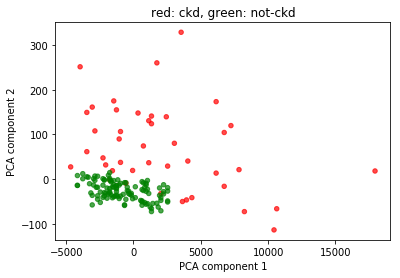

In [10]:
# Copy dataframe to apply a correction later on
df1 = df
pca1 = PCA(n_components=2)
pca1.fit(df1)
T1 = pca1.transform(df1) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T1 = pd.DataFrame(T1)

# plot the data
T1.columns = ['PCA component 1', 'PCA component 2']
T1.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

Con el análisis PCA se pueden graficar dos atributos 

Es necesario además importar la biblioteca de `preprocesing` de `sklearn` para poder mejorar el desempeño del análisis PCA

In [11]:
from sklearn import preprocessing

Para esto se normalizan los datos con lo que la media se ajusta a 0 y la varianza a 1 para todos los atributos.

C:\Users\dkohkemper\AppData\Local\conda\conda\envs\Inv-Corta-1.ipynb\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dkohkemper\AppData\Local\conda\conda\envs\Inv-Corta-1.ipynb\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


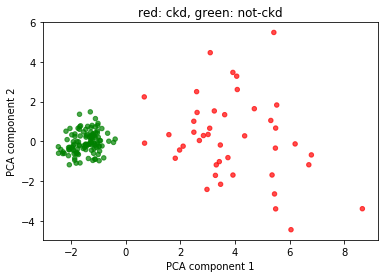

In [12]:
# Copy dataframe to apply a different processing
df2 = df

# StandardScaler: mean=0, variance=1
df2 = preprocessing.StandardScaler().fit_transform(df2)

pca2 = PCA(n_components=2)
pca2.fit(df2)
T2 = pca2.transform(df2) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T2 = pd.DataFrame(T2)

# plot the data
T2.columns = ['PCA component 1', 'PCA component 2']
T2.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

Se observa que al normalizar los datos, es más evidente la separación de datos que indica cuáles muestras presentan la enfermedad cónica de riñón. El comando fit_transform devuelve una advertencia sobre el tipo de dato al cual está convirtiendo pero este puede ser ignorado.

# Conclusiones

En este tutorial se explicó en qué consiste la biblioteca `Pandas` en Python y cómo puede ser utilizada para el análisis y procesamiento de datos. Se mostraron comandos básicos para poder cargar, manejar y limpiar datos provenientes de un dataset, que son muy comunes de encontrar en internet. Finalmente, se mostró el uso de otras bibliotecas como `matplotlib` para graficar datos así como `sklearn` para el preprocesamiento y análisis PCA de datos.

# Referencias

[1] [Jupyter Notebook Tutorial: The Definitive Guide](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

[2] [Cleaning Dirty Data with Pandas & Python](http://www.developintelligence.com/blog/2017/08/data-cleaning-pandas-python/)

[3] [Pythonic Data Cleaning With NumPy and Pandas](https://realpython.com/python-data-cleaning-numpy-pandas/)

[4] [12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

[5] [A Quick Introduction to the “Pandas” Python Library](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)

[6] [Basic Time Series Manipulation with Pandas](https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea)

[7] [8. Preprocessing of the data using Pandas and SciKit](https://mclguide.readthedocs.io/en/latest/sklearn/preprocessing.html#basic-pca-analysis)